In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


## **Setting Parameters**

In [2]:
img_size = [224, 224]

In [3]:
train_path = 'D:/trainData'
test_path = 'D:/testData'
num_classes = 3

## **Loading Model and Removing Top Layer**

In [4]:
vgg = VGG16(input_shape=img_size + [3], weights='imagenet', include_top=False)

## **Freezing and Adding Layers**

In [5]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=predictions)

## **Creating Model**

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

## **Data Agumentation**

In [7]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


## **Genrating Data Batches**

In [8]:
train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 12003 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


## **Encoding Class Labels**

In [9]:
train_labels = to_categorical(train_set.classes, num_classes=num_classes)
test_labels = to_categorical(test_set.classes, num_classes=num_classes)


## **Model Checkpoint**

In [10]:
checkpoint = ModelCheckpoint(filepath="final_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


## **Learning rate reduction callback**

In [11]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

## **Training the Model**

In [12]:
model_history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=5,
    validation_steps=32,
    verbose=2,
    callbacks=[checkpoint, reduce_lr]
)

Epoch 1/10


d:\Details\project\Mini Project\vgg-16,19\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.68164, saving model to final_model.keras
5/5 - 222s - 44s/step - accuracy: 0.5750 - loss: 7.8007 - val_accuracy: 0.6816 - val_loss: 3.2427 - learning_rate: 1.0000e-04
Epoch 2/10

Epoch 2: val_accuracy improved from 0.68164 to 0.99219, saving model to final_model.keras
5/5 - 207s - 41s/step - accuracy: 0.7188 - loss: 4.9594 - val_accuracy: 0.9922 - val_loss: 0.0713 - learning_rate: 1.0000e-04
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.99219
5/5 - 190s - 38s/step - accuracy: 0.7688 - loss: 5.9269 - val_accuracy: 0.9548 - val_loss: 0.5141 - learning_rate: 1.0000e-04
Epoch 4/10


C:\Users\abhis\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 4: val_accuracy did not improve from 0.99219
5/5 - 198s - 40s/step - accuracy: 0.7625 - loss: 5.3051 - val_accuracy: 0.7725 - val_loss: 4.1483 - learning_rate: 1.0000e-04
Epoch 5/10

Epoch 5: val_accuracy improved from 0.99219 to 0.99707, saving model to final_model.keras
5/5 - 213s - 43s/step - accuracy: 0.8687 - loss: 3.0559 - val_accuracy: 0.9971 - val_loss: 0.0306 - learning_rate: 1.0000e-04
Epoch 6/10

Epoch 6: val_accuracy did not improve from 0.99707
5/5 - 198s - 40s/step - accuracy: 0.8125 - loss: 5.4012 - val_accuracy: 0.9296 - val_loss: 1.0076 - learning_rate: 1.0000e-04
Epoch 7/10

Epoch 7: val_accuracy did not improve from 0.99707
5/5 - 200s - 40s/step - accuracy: 0.8313 - loss: 3.7228 - val_accuracy: 0.7832 - val_loss: 4.0531 - learning_rate: 1.0000e-04
Epoch 8/10

Epoch 8: val_accuracy did not improve from 0.99707
5/5 - 239s - 48s/step - accuracy: 0.8313 - loss: 2.9760 - val_accuracy: 0.9961 - val_loss: 0.0373 - learning_rate: 1.0000e-04
Epoch 9/10

Epoch 9: val_ac

## **Model Evaluation**

In [13]:
loss, accuracy = model.evaluate(test_set, verbose=0)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


Test Accuracy: 92.00%


## **Plotting Training History**

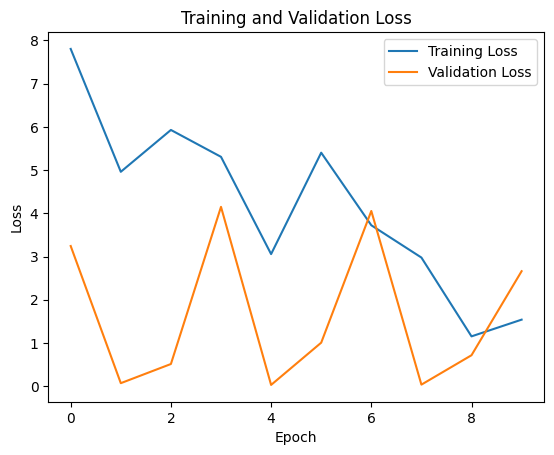

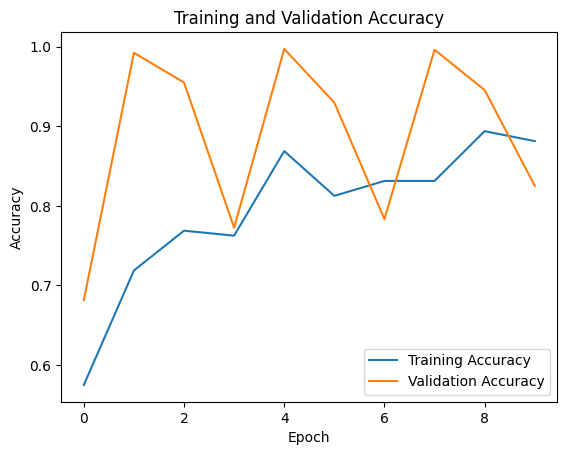

In [14]:
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## **Confusion Matrix and Classification Report**

94/94 ━━━━━━━━━━━━━━━━━━━━ 697s 7s/step


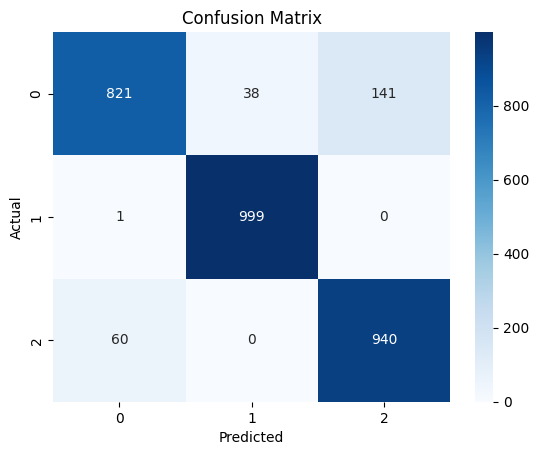

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1000
           1       0.96      1.00      0.98      1000
           2       0.87      0.94      0.90      1000

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [15]:
import seaborn as sns

y_pred_prob = model.predict(test_set)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test_set.classes

conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)


In [17]:
from keras.preprocessing import image as keras_image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.optimizers import legacy
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings

from keras.preprocessing import image as keras_image
import numpy as np
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model

def predict_image_class(image_path, model_path, class_folders):
    
    img = keras_image.load_img(image_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
   
    processed_img = preprocess_input(img_array)
    
    model = load_model(model_path) 
    predictions = model.predict(processed_img)
   
    predicted_class = np.argmax(predictions)
    return class_folders[predicted_class]


image_path = "D:/Details/project/Mini Project/vgg-16,19/la.jpeg"
model_path = "final_model.keras"
class_folders = ['lung_aca', 'lung_n', 'lung_scc']  
predicted_class = predict_image_class(image_path, model_path, class_folders)
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: lung_scc
